# Investment Market Analysis

Software company is looking for new products to invest in. This project is the analysis of dataset that will help company identify the suitable market.


The dataset used in this project comes from "FreeCode Camp" online surevey. FreeCode camp in free elearning site that offers courses of Web Developement. The  ready-made data was choosen due to cost effectiveness and versatile backgrounds of coders that participated in this online survey. The [data](https://github.com/freeCodeCamp/2017-new-coder-survey) can be downloaded from the github repository.


In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [283]:
df_original = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv")

C:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (17,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [284]:
df = df_original.copy()

In [285]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Data columns (total 136 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            15367 non-null  float64
 1   AttendedBootcamp               17709 non-null  float64
 2   BootcampFinish                 1069 non-null   float64
 3   BootcampLoanYesNo              1079 non-null   float64
 4   BootcampName                   949 non-null    object 
 5   BootcampRecommend              1073 non-null   float64
 6   ChildrenNumber                 2314 non-null   float64
 7   CityPopulation                 15354 non-null  object 
 8   CodeEventConferences           1609 non-null   float64
 9   CodeEventDjangoGirls           165 non-null    float64
 10  CodeEventFCC                   1708 non-null   float64
 11  CodeEventGameJam               290 non-null    float64
 12  CodeEventGirlDev               297 non-null  

Lets drop nan's from Job interest column, cause predicting someones interest is pointless.

In [286]:
# df.dropna(subset = ['JobInterestDataEngr', 'JobInterestDataSci', 'JobInterestDevOps',
#    'JobInterestFrontEnd', 'JobInterestFullStack', 'JobInterestGameDev',
#    'JobInterestInfoSec', 'JobInterestMobile', 'JobInterestOther',
#    'JobInterestProjMngr', 'JobInterestQAEngr', 'JobInterestUX', 'JobPref'], axis=0, inplace=True)

In [287]:
df.dropna(subset= ["JobRoleInterest"], inplace=True)

Lets analyze the Country Live columns, since its more important to target the market where people are living in than where they are from.


In [288]:
country_rel = df['CountryLive'].value_counts(normalize=True)*100
country_abs = df['CountryLive'].value_counts()

Since the values are sorted by descending order lets just plot first 10 values to see the countires and their share of population

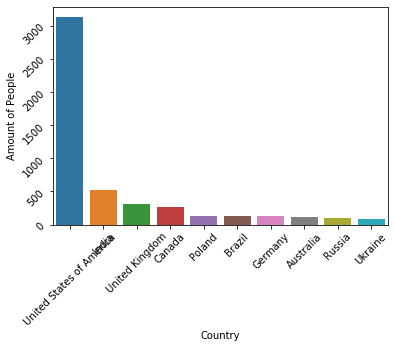

In [289]:
sns.barplot(country_abs.index.values[:10],country_abs[:10])
plt.xlabel("Country")
plt.ylabel("Amount of People")
plt.tick_params(labelrotation=45)

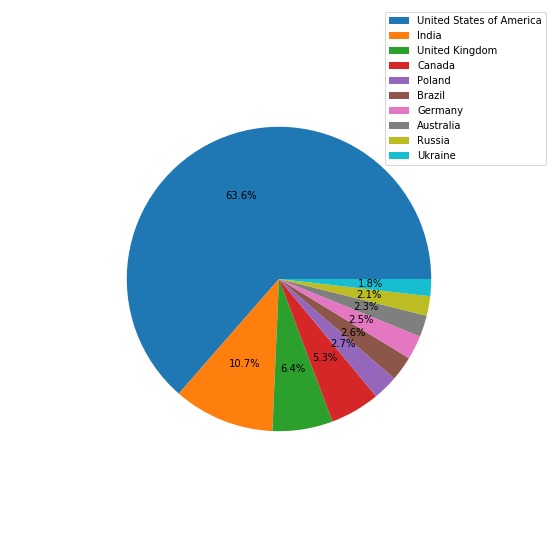

In [290]:
plt.figure(figsize=(10,10))
plt.pie(country_rel[:10], autopct="%.1f%%", radius=0.7);
plt.legend(labels=['United States of America', 'India', 'United Kingdom', 'Canada',
                   'Poland', 'Brazil', 'Germany', 'Australia', 'Russia', 'Ukraine'], loc=0)


Four countries that should be of priority are US,India, UK and Canada by population and same national language english.

In [291]:
largest_share_countries= df[(df.CountryLive == 'India') | (df.CountryLive == 'United States of America') |
                            (df.CountryLive == "United Kingdom") |(df.CountryLive == "Canada") ].copy()


Analysis On Money Spent per Month

In [292]:
money_spent_per_mnth = largest_share_countries.MoneyForLearning/ largest_share_countries.MonthsProgramming

In [293]:
largest_share_countries.loc[:,'MonthlyMoneySpent']=money_spent_per_mnth

lets remove the null values from the countrylive and money_spent_per_mnth column

In [294]:
largest_share_countries.MonthlyMoneySpent.unique()

array([1.33333333e+01, 2.00000000e+02, 0.00000000e+00,            nan,
       1.66666667e+01, 3.57142857e+01, 1.78571429e+01, 1.00000000e+02,
       2.85714286e+02, 2.41666667e+00, 6.66666667e+01, 8.33333333e+01,
       2.50000000e+01, 5.00000000e+01, 2.77777778e+00, 1.78571429e+00,
       3.57142857e+02, 1.05263158e+00, 1.66666667e+02, 3.54166667e+01,
       1.87500000e+01, 1.00000000e+01, 4.16666667e-01, 1.11111111e+01,
       2.08333333e+01, 2.77777778e+01, 3.50000000e+01, 1.50000000e+01,
       4.73684211e+00,            inf, 8.33333333e-01, 2.50000000e+02,
       5.83333333e+01, 3.12500000e+01, 2.50000000e+00, 1.25000000e+02,
       1.17500000e+02, 8.33333333e+00, 1.60000000e+02, 6.25000000e+01,
       3.33333333e+00, 3.86111111e+02, 5.00000000e+02, 9.09090909e+02,
       5.58333333e+01, 4.16666667e+00, 2.77777778e+02, 2.72727273e+00,
       2.00000000e+01, 1.04166667e+01, 4.82758621e+02, 3.33333333e+01,
       2.22222222e+01, 1.25000000e+01, 6.25000000e+02, 6.42857143e+01,
      

In [295]:
# It seems theres inf in the df so lets replace it
largest_share_countries.replace([np.inf, -np.inf], np.nan,inplace=True)

In [296]:
largest_share_countries.dropna(subset=['MonthlyMoneySpent', 'CountryLive'],inplace=True)

In [297]:
print(largest_share_countries.groupby('CountryLive').mean()['MonthlyMoneySpent'])
print(largest_share_countries.groupby('CountryLive').agg(pd.Series.mode)['MonthlyMoneySpent'])
print(largest_share_countries.groupby('CountryLive').median()['MonthlyMoneySpent'])

CountryLive
Canada                      107.415450
India                       136.347477
United Kingdom               46.904110
United States of America    232.771574
Name: MonthlyMoneySpent, dtype: float64
CountryLive
Canada                      0.0
India                       0.0
United Kingdom              0.0
United States of America    0.0
Name: MonthlyMoneySpent, dtype: float64
CountryLive
Canada                      0.000000
India                       0.000000
United Kingdom              0.150000
United States of America    4.166667
Name: MonthlyMoneySpent, dtype: float64


According to the average money spent by students per month, US and India are still on firs and second position. However, students in UK seem to spend less than student in Canada. But most of students don't pay money in all countries. While more then half of total student only spent about 5 dollars in US on education.

## Outliers 

The above data is unexpected interms of per capita, gdp of countries like UK and Canada. Lets check for outliers and data imbalance.

In [298]:
desc_by_country= largest_share_countries.groupby('CountryLive').describe()['MonthlyMoneySpent']
print(desc_by_country)

                           count        mean          std  min  25%       50%  \
CountryLive                                                                     
Canada                     235.0  107.415450   427.998882  0.0  0.0  0.000000   
India                      454.0  136.347477   699.412909  0.0  0.0  0.000000   
United Kingdom             270.0   46.904110   164.811738  0.0  0.0  0.150000   
United States of America  2810.0  232.771574  1974.260414  0.0  0.0  4.166667   

                                75%      max  
CountryLive                                   
Canada                    25.000000   5000.0  
India                     12.875000  10000.0  
United Kingdom            20.833333   1400.0  
United States of America  50.000000  80000.0  


In [299]:
#from above iqr = 1.5*(75%-25%)
iqr_us = 1.5* (desc_by_country.loc['United States of America'][6]-desc_by_country.loc['United States of America'][4])

iqr_uk = 1.5* (desc_by_country.loc['United Kingdom'][6]-desc_by_country.loc['United Kingdom'][4])
iqr_canada = 1.5* (desc_by_country.loc['Canada'][6]-desc_by_country.loc['Canada'][4])
iqr_india = 1.5* (desc_by_country.loc['India'][6]-desc_by_country.loc['India'][4])


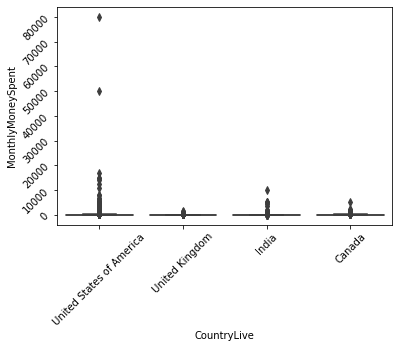

In [300]:
sns.boxplot( x='CountryLive' ,y="MonthlyMoneySpent",data=largest_share_countries)
# The upper limit in ylim below is the exterme values above which all values are outliers for US. 
#Us was chooses due to its largest proportion
plt.tick_params(labelrotation=45)

Lets Zoom IN

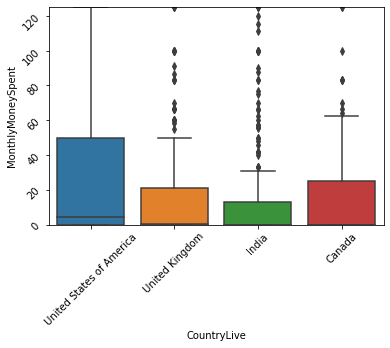

In [301]:
sns.boxplot( x='CountryLive' ,y="MonthlyMoneySpent",data=largest_share_countries)
# The upper limit in ylim below is the exterme values above which all values are outliers for US. 
#Us was chooses due to its largest proportion
plt.ylim((0,desc_by_country.loc['United States of America'][6] + iqr_us))
plt.tick_params(labelrotation=45)

So, it seems India, US have lots of outliers. The max value in US Is 80k where as upper extreme is just 120 . However, due to differnce in gdp, not all values can be fake or outliers.So, lets remove outliers that are greater then 3 times IQR of respective countries. 

## Create Outlier Free DF by Countries

In [302]:

us_outlier_free = largest_share_countries[(largest_share_countries['CountryLive']=="United States of America") & (largest_share_countries['MonthlyMoneySpent']<=3 *iqr_us)]
# us_outlier_free = largest_share_countries[(largest_share_countries['CountryLive']=="United States of America")]

canada_outlier_free = largest_share_countries[(largest_share_countries['CountryLive']=="Canada") & (largest_share_countries['MonthlyMoneySpent']<= 1.5*iqr_canada)]
india_outlier_free = largest_share_countries[(largest_share_countries['CountryLive']=="India") & (largest_share_countries['MonthlyMoneySpent']<= 1.5*iqr_india)]
uk_outlier_free = largest_share_countries[(largest_share_countries['CountryLive']=="United Kingdom") & (largest_share_countries['MonthlyMoneySpent']<= 1.5*iqr_uk)]

In [303]:
print("US: ", us_outlier_free.MonthlyMoneySpent.mean())
print("UK: ",uk_outlier_free.MonthlyMoneySpent.mean())
print("Canada:", canada_outlier_free.MonthlyMoneySpent.mean())
print("India: ",india_outlier_free.MonthlyMoneySpent.mean())

US:  21.63847048909258
UK:  5.3693003747502015
Canada: 6.397992544810482
India:  2.4944469145572032


The above values gives rank rather than precise earning since the any value above 1.5 times was considered outliers.But the task is to find the countries that can spend more 59/mnth subscription

In [305]:
# From the first boxplot its obvious us have varying range, so lets cut the values above 18k gain new df

outlier_free_df = largest_share_countries[largest_share_countries['MonthlyMoneySpent']<=18000]

In [306]:
print(outlier_free_df.groupby('CountryLive').mean()['MonthlyMoneySpent'])

CountryLive
Canada                      107.415450
India                       136.347477
United Kingdom               46.904110
United States of America    186.641069
Name: MonthlyMoneySpent, dtype: float64
